In [1]:
%load_ext autoreload
%autoreload 2

import cfr
import os
os.chdir('/glade/u/home/fengzhu/Github/cfr/docsrc/notebooks/')

In [2]:
job = cfr.ReconJob()
job.load_proxydb('PAGES2kv2')

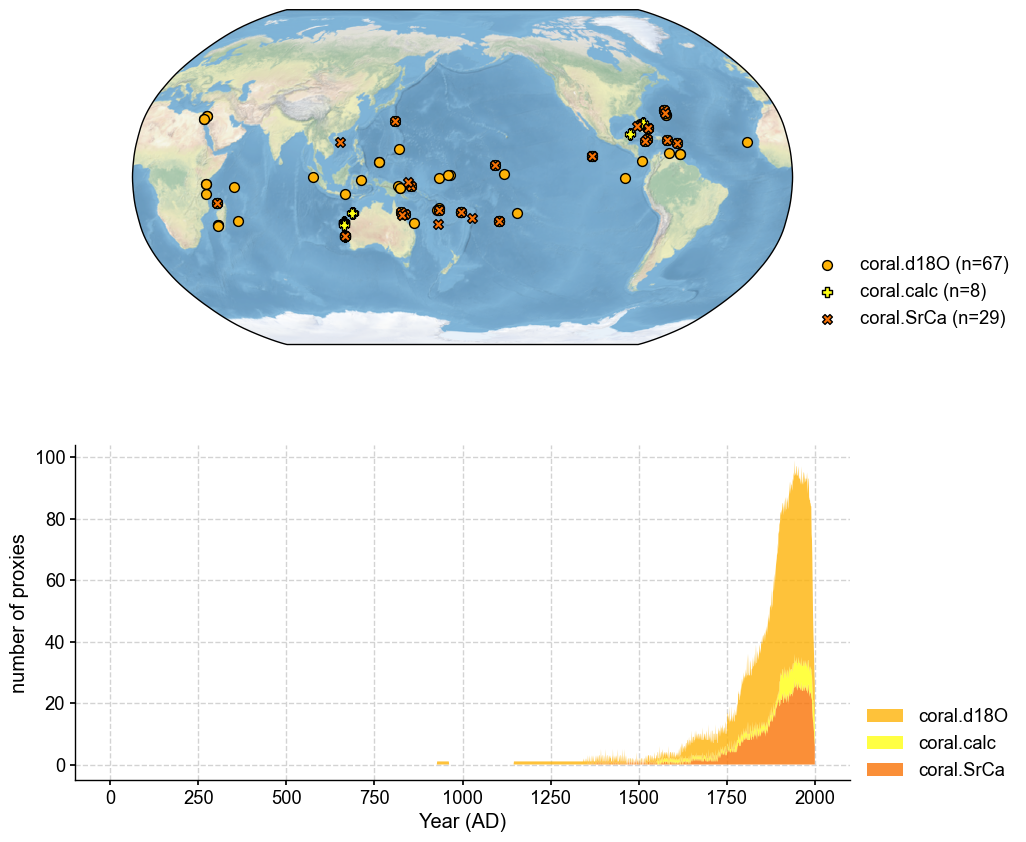

In [3]:
job.filter_proxydb(by='ptype', keys=['coral'])
fig, ax = job.proxydb.plot(plot_count=True)

In [4]:
job.annualize_proxydb(months=[12, 1, 2], ptypes=['coral'])

Annualizing ProxyDatabase: 100%|██████████| 104/104 [00:05<00:00, 20.78it/s]


In [5]:
job.center_proxydb(verbose=True)

>>> job.configs["proxydb_center_ref_period"] = [1951, 1980]


Centering each of the ProxyRecord:   0%|          | 0/104 [00:00<?, ?it/s]/glade/work/fengzhu/conda-envs/cfr-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/glade/work/fengzhu/conda-envs/cfr-env/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
Centering each of the ProxyRecord: 100%|██████████| 104/104 [00:00<00:00, 5412.68it/s]

>>> job.proxydb updated


In [6]:
job.load_clim(
    tag='obs',
    path_dict={
        'tas': 'gistemp1200_GHCNv4_ERSSTv5',
    },
    rename_dict={'tas': 'tempanomaly'},
    anom_period=(1951, 1980),
    verbose=True,
)

>>> job.configs["obs_path"] = {'tas': 'gistemp1200_GHCNv4_ERSSTv5'}
>>> job.configs["obs_rename_dict"] = {'tas': 'tempanomaly'}
>>> job.configs["obs_anom_period"] = (1951, 1980)
>>> job.configs["obs_lat_name"] = lat
>>> job.configs["obs_lon_name"] = lon
>>> job.configs["obs_time_name"] = time
>>> The target file seems existed at: ./data/gistemp1200_GHCNv4_ERSSTv5.nc.gz . Loading from it instead of downloading ...
>>> obs variables ['tas'] loaded
>>> job.obs created


In [7]:
job.annualize_clim(tag='obs', months=[12, 1, 2], verbose=True)
job.regrid_clim(tag='obs', nlat=42, nlon=63, verbose=True)
job.crop_clim(tag='obs', lat_min=-35, lat_max=35, verbose=True)

>>> job.configs["obs_annualize_months"] = [12, 1, 2]
>>> Processing tas ...
>>> job.obs updated
>>> job.configs["obs_regrid_nlat"] = 42
>>> job.configs["obs_regrid_nlon"] = 63
>>> Processing tas ...
>>> job.configs["prior_lat_min"] = -35
>>> job.configs["prior_lat_max"] = 35
>>> job.configs["prior_lon_min"] = 0
>>> job.configs["prior_lon_max"] = 360
>>> Processing tas ...


In [8]:
job.prep_graphem(
    recon_period=(1801, 2000),  # period to reconstruct
    calib_period=(1901, 2000),  # period for calibration
    verbose=True,
)

>>> job.configs["recon_period"] = (1801, 2000)
>>> job.configs["recon_timescale"] = 1
>>> job.configs["calib_period"] = (1901, 2000)
>>> job.graphem_params["recon_time"] created
>>> job.graphem_params["calib_time"] created
>>> job.graphem_params["field_obs"] created
>>> job.graphem_params["calib_idx"] created
>>> job.graphem_params["field"] created
>>> job.graphem_params["df_proxy"] created
>>> job.graphem_params["proxy"] created
>>> job.graphem_params["lonlat"] created


In [9]:
%%time

job.run_graphem(
    save_dirpath='./recons/graphem-real-pages2k-2',
    graph_method='neighborhood',
    cutoff_radius=1500,
    verbose=True,
)

>>> job.configs["compress_params"] = {'zlib': True}
>>> job.configs["save_dirpath"] = ./recons/graphem-real-pages2k-2
>>> job.configs["save_filename"] = job_r01_recon.nc
Computing a neighborhood graph with R = 1500.0 km
Estimating graph using neighborhood method


/glade/work/fengzhu/conda-envs/cfr-env/lib/python3.9/site-packages/graphem/GraphEstimation.py:191: RuntimeWarning: invalid value encountered in arcsin
  c = 2 * arcsin(sqrt(a))


Running GraphEM:



EM | dXmis: 0.1057; rdXmis: nan:   0%|          | 1/200 [00:43<2:24:22, 43.53s/it]

GraphEM.EM(): Tolerance achieved.
job.graphem_solver created and saved to: None
>>> job.recon_fields created
>>> Reconstructed fields saved to: ./recons/graphem-real-pages2k-2/job_r01_recon.nc
CPU times: user 52.2 s, sys: 40.5 ms, total: 52.2 s
Wall time: 52.2 s


In [10]:
res = cfr.ReconRes('./recons/graphem-real-pages2k-2')
res.load(['nino3.4', 'tas'], verbose=True)

>>> ReconRes.recons["nino3.4"] created
>>> ReconRes.da["nino3.4"] created
>>> ReconRes.recons["tas"] created
>>> ReconRes.da["tas"] created


In [11]:
target = cfr.ClimateField().fetch('20CRv3/tas', vn='air').rename('tas').get_anom((1951, 1980))

>>> The target file seems existed at: ./data/air.2m.mon.mean.nc . Loading from it instead of downloading ...


In [12]:
target = target.annualize(months=[12, 1, 2]).crop(lat_min=-35, lat_max=35)
target.da

<xarray.DataArray 'tas' (time: 181, lat: 71, lon: 360)>
array([[[-0.72366333, -0.75071716, -0.7328949 , ..., -0.7309723 ,
         -0.68304443, -0.675354  ],
        [-0.8072052 , -0.80418396, -0.7583313 , ..., -0.771698  ,
         -0.745224  , -0.7675171 ],
        [-0.7741394 , -0.765152  , -0.7289276 , ..., -0.80792236,
         -0.77575684, -0.7703705 ],
        ...,
        [-1.9167633 , -2.0245056 , -2.1382446 , ..., -1.4160156 ,
         -1.6085968 , -1.7595978 ],
        [-1.7813721 , -1.8453217 , -1.94104   , ..., -1.3635254 ,
         -1.518753  , -1.6648407 ],
        [-1.681366  , -1.8431091 , -1.9763184 , ..., -0.9181824 ,
         -1.0700226 , -1.392273  ]],

       [[-0.885142  , -0.8900859 , -0.90685016, ..., -0.9297587 ,
         -0.871226  , -0.86743164],
        [-1.0433044 , -1.0435995 , -1.0353903 , ..., -0.95008343,
         -0.95111084, -1.0016378 ],
        [-1.1193441 , -1.1181844 , -1.1027933 , ..., -1.0076599 ,
         -1.0325216 , -1.0857443 ],
...
        [-0.7697449 , -0.6768901 , -0.5923462 , ..., -0.56062824,
         -0.68392944, -0.78031415],
        [-0.87024945, -0.837382  , -0.76048785, ..., -0.61620075,
         -0.72455853, -0.82958984],
        [-0.6300557 , -0.6863912 , -0.7022502 , ..., -0.12608846,
         -0.24433391, -0.4693502 ]],

       [[ 1.1114197 ,  1.1156616 ,  1.1440125 , ...,  1.1346741 ,
          1.0916748 ,  1.070221  ],
        [ 0.9642334 ,  1.019104  ,  1.1342773 , ...,  1.1085205 ,
          1.0567322 ,  0.9859314 ],
        [ 0.92681885,  0.9468384 ,  0.9932251 , ...,  1.0208435 ,
          1.0012512 ,  0.94000244],
        ...,
        [ 1.573761  ,  1.3674316 ,  1.1996155 , ...,  2.4711304 ,
          2.2483215 ,  1.8666077 ],
        [ 2.556244  ,  2.3460693 ,  2.0101624 , ...,  3.1957703 ,
          3.0577087 ,  2.749237  ],
        [ 3.0726013 ,  2.9905396 ,  2.7269592 , ...,  2.7269897 ,
          2.9135742 ,  3.011139  ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -35.0 -34.0 -33.0 -32.0 -31.0 ... 32.0 33.0 34.0 35.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) int64 1836 1837 1838 1839 1840 ... 2012 2013 2014 2015 2016
Attributes:
    annualized:  1

/glade/work/fengzhu/conda-envs/cfr-env/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/glade/work/fengzhu/conda-envs/cfr-env/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


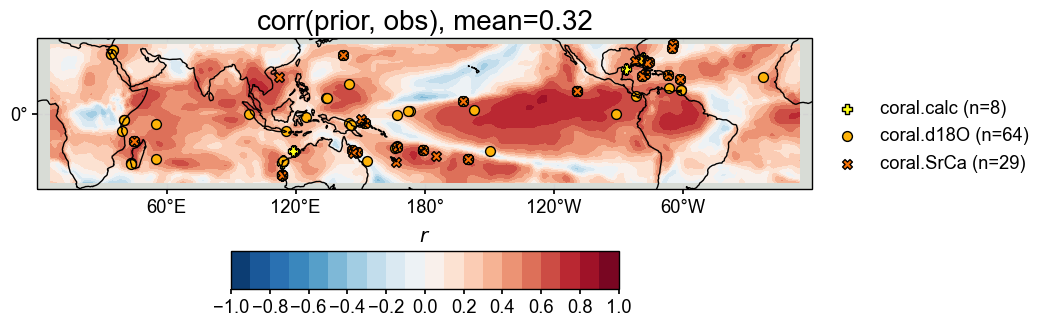

Figure saved at: "figs/corr_recon_obs_graphem_2.pdf"


In [14]:
# validate the reconstruction against 20CR
stat = 'corr'

valid_fd = res.recons['tas'].compare(
    target, stat=stat,
    timespan=(1874, 1900),
)
valid_fd.plot_kwargs.update({'cbar_orientation': 'horizontal', 'cbar_pad': 0.1})

fig, ax = valid_fd.plot(
    title=f'{stat}(prior, obs), mean={valid_fd.geo_mean().value[0,0]:.2f}',
    projection='PlateCarree',
    latlon_range=(-35, 35, 0, 360),
    plot_cbar=True,
    plot_proxydb=True, proxydb=job.proxydb,
    proxydb_lgd_kws={'loc': 'lower left', 'bbox_to_anchor': (1, 0)},
)

cfr.showfig(fig)
cfr.savefig(fig, f'./figs/{stat}_recon_obs_graphem_2.pdf')

In [15]:
target_nino34 = target.index('nino3.4')

<Axes: xlabel='Year (CE)'>

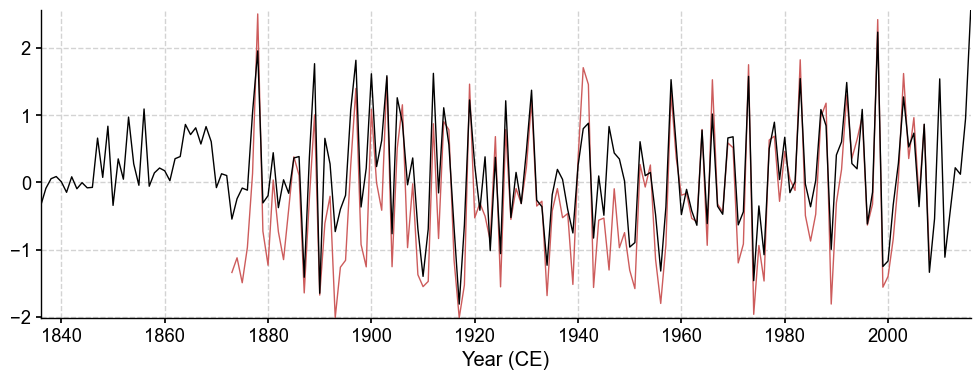

In [16]:
bc09 = cfr.EnsTS().fetch('BC09_NINO34')
bc09_ann = bc09.annualize(months=[12, 1, 2])
fig, ax = bc09_ann.plot()
target_nino34.plot(ax=ax, color='k')

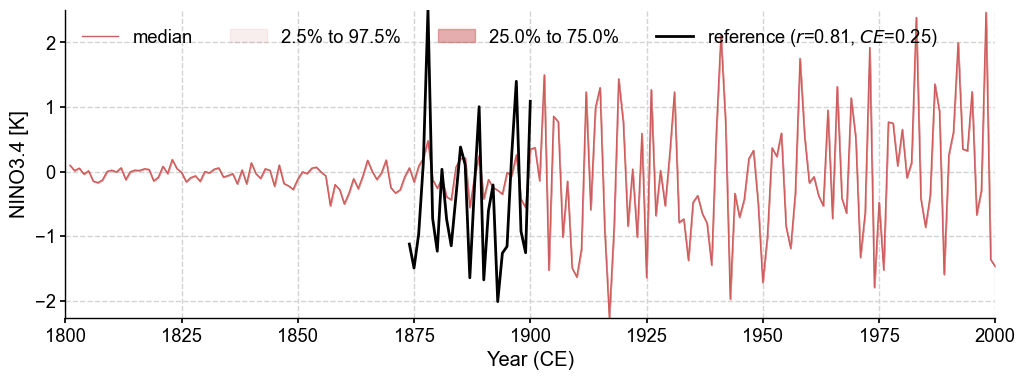

Figure saved at: "figs/corr_recon_BC09_graphem.pdf"


In [17]:
fig, ax = res.recons['nino3.4'].compare(bc09_ann, timespan=(1874, 1900)).plot_qs()
ax.set_xlim(1800, 2000)
ax.set_ylabel('NINO3.4 [K]')
cfr.showfig(fig)
cfr.savefig(fig, f'./figs/corr_recon_BC09_graphem.pdf')